In [1]:
import os
import datetime
import dateutil
import tarfile
import requests
import pandas as pd
import pandas.io.sql as sqlio

%matplotlib inline

In [4]:
os.listdir('../boursorama/2023')[:5]

['compB 2023-11-21 10:12:01.914574.bz2',
 'amsterdam 2023-01-23 16:42:01.777744.bz2',
 'compA 2023-04-10 09:12:01.301255.bz2',
 'compA 2023-07-12 11:42:01.793751.bz2',
 'peapme 2023-01-25 16:12:01.637978.bz2']

In [5]:
df = pd.read_pickle('../boursorama/2023/compB 2023-11-21 10:12:01.914574.bz2') # read_pickle to read Pandas DataFrames

In [6]:
df.head()

,last,volume,symbol,name
symbol,,,,
1rPAB,2.885,56246,1rPAB,SRDAB SCIENCE
1rPABCA,4.980,6675,1rPABCA,SRDABC ARBITRAGE
1rPABVX,10.240,1907,1rPABVX,ABIVAX
1rPABLD,9.700(c),0,1rPABLD,ABL DIAGNOSTICS
1rPAAC,9.950(c),0,1rPAAC,ACCOR ACQ COM


In [15]:

import glob
def collecte_df(directory_path:str="../boursorama/2023/", market_name:str="compA") ->pd.DataFrame:
    dfglob = glob.glob1(directory_path, market_name + "*")
    files_path = [directory_path + file for file in dfglob]
    df = pd.DataFrame()
    for i in range(len(files_path)):
        _, date, heure = dfglob[i].split()
        df_tmp = pd.read_pickle(files_path[i])
        line = date + " " + heure.split(".bz2")[0]
        df_tmp.index = pd.to_datetime([line] * df_tmp.shape[0])
        df = pd.concat([df, df_tmp])
        print("Pourcentage: ", round(i / len(files_path) * 100))
    return df

In [16]:
compA = collecte_df(market_name="compA")

Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcentage:  0
Pourcent

In [17]:
compA

,last,volume,symbol,name
2023-04-10 09:12:01.301255,58.010(c),0,1rPABBV,ABBVIE
2023-04-10 09:12:01.301255,30.240(c),1050120,1rPAC,SRDACCOR
2023-04-10 09:12:01.301255,46.020(c),0,1rPACNV,ACCOR
2023-04-10 09:12:01.301255,134.100(c),78799,1rPADP,SRDADP
2023-04-10 09:12:01.301255,0.000,0,1rPAGNDT,AEGON DO22
...,...,...,...,...
2023-01-27 16:12:01.690292,0.000(c),0,1rPWLNNV,WORLDLINE
2023-01-27 16:12:01.690292,8.135,184355,1rPXFAB,X-FAB SILICON
2023-01-27 16:12:01.690292,315.000(c),0,1rPXPO,SRDXPO LOGISTICS
2023-01-27 16:12:01.690292,24.830(c),0,1rPZC,ZODIAC AERO


In [18]:
compA.dtypes

last      object
volume     int64
symbol    object
name      object
dtype: object

In [20]:
import numpy as np
axa = compA[compA["name"] == "AXA"]
axa.head(10)

,last,volume,symbol,name
2023-04-10 09:12:01.301255,27.000(c),3743,1rPCSNV,AXA
2023-07-12 11:42:01.793751,27.500(c),0,1rPCSNV,AXA
2023-04-27 17:22:01.818295,28.900(c),0,1rPCSNV,AXA
2023-12-19 13:22:01.959244,27.500(c),0,1rPCSNV,AXA
2023-06-06 12:32:01.782912,27.500(c),0,1rPCSNV,AXA
2023-06-27 14:22:02.234281,27.500(c),0,1rPCSNV,AXA
2023-08-22 10:02:02.011346,27.500(c),0,1rPCSNV,AXA
2023-12-11 15:22:01.607260,27.500(c),0,1rPCSNV,AXA
2023-06-08 15:32:01.786464,27.500(c),0,1rPCSNV,AXA
2023-10-25 15:42:01.503614,27.500(c),0,1rPCSNV,AXA


In [26]:
#delete (c) from last = 27.000(c) for the conversion into a float
axa["last"] = [x.split("(c)")[0] for x in axa["last"]]
axa.head()

/var/folders/gq/smvy125s6gvg8fmg2wlp7flc0000gn/T/ipykernel_18004/448072974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axa["last"] = [x.split("(c)")[0] for x in axa["last"]]


,last,volume,symbol,name
2023-04-10 09:12:01.301255,27.000,3743,1rPCSNV,AXA
2023-07-12 11:42:01.793751,27.500,0,1rPCSNV,AXA
2023-04-27 17:22:01.818295,28.900,0,1rPCSNV,AXA
2023-12-19 13:22:01.959244,27.500,0,1rPCSNV,AXA
2023-06-06 12:32:01.782912,27.500,0,1rPCSNV,AXA


In [28]:
#delete (s) from last = 27.000(s) for the conversion into a float
axa["last"] = [x.split("(s)")[0] for x in axa["last"]]
axa.head()

/var/folders/gq/smvy125s6gvg8fmg2wlp7flc0000gn/T/ipykernel_18004/143604803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axa["last"] = [x.split("(s)")[0] for x in axa["last"]]


,last,volume,symbol,name
2023-04-10 09:12:01.301255,27.000,3743,1rPCSNV,AXA
2023-07-12 11:42:01.793751,27.500,0,1rPCSNV,AXA
2023-04-27 17:22:01.818295,28.900,0,1rPCSNV,AXA
2023-12-19 13:22:01.959244,27.500,0,1rPCSNV,AXA
2023-06-06 12:32:01.782912,27.500,0,1rPCSNV,AXA


In [29]:
axa["last"] = axa["last"].astype("float")
print("moyenne des cours d'AXA: ",np.mean(axa["last"]))

moyenne des cours d'AXA:  27.20030323238663


/var/folders/gq/smvy125s6gvg8fmg2wlp7flc0000gn/T/ipykernel_18004/3927867015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axa["last"] = axa["last"].astype("float")


<Axes: >

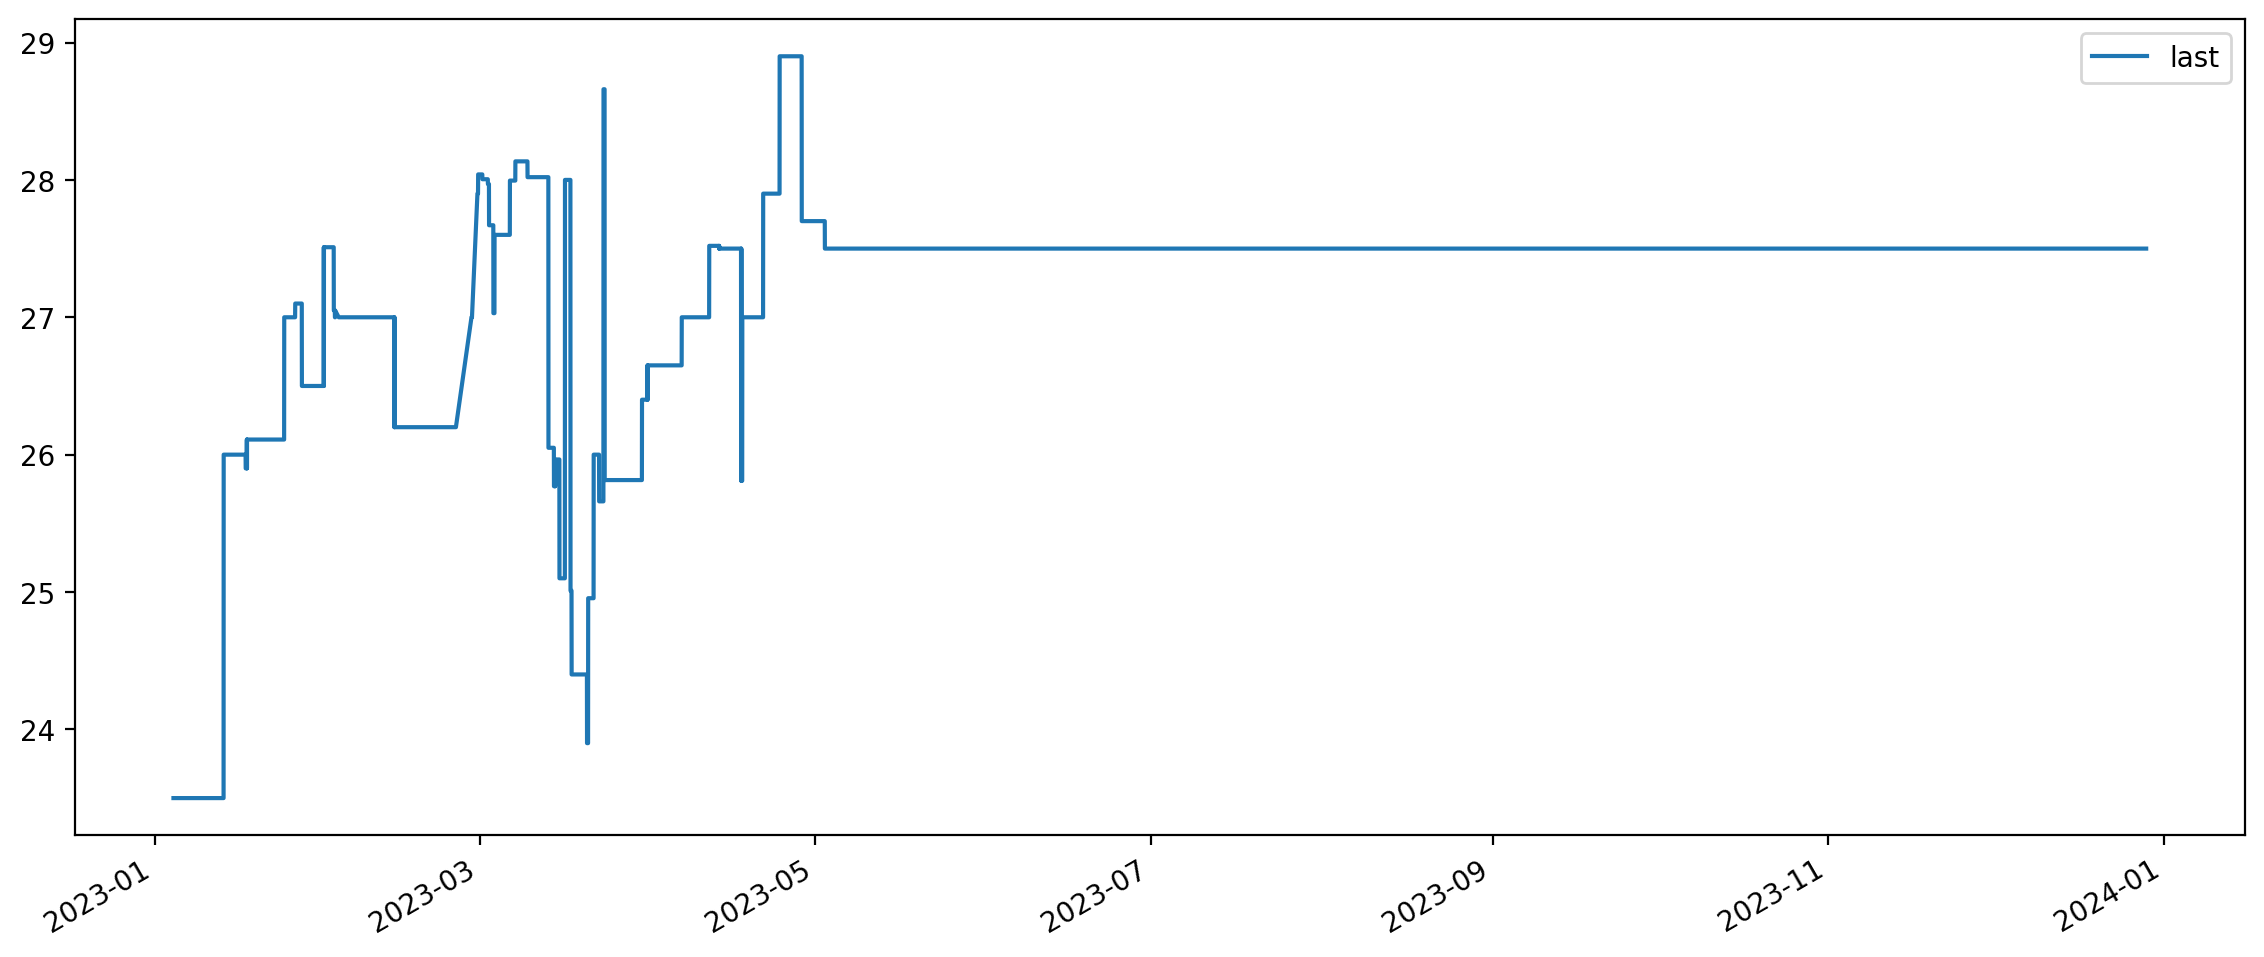

In [30]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Tracer les données
axa.plot( y="last", figsize=(14, 6))

<Axes: >

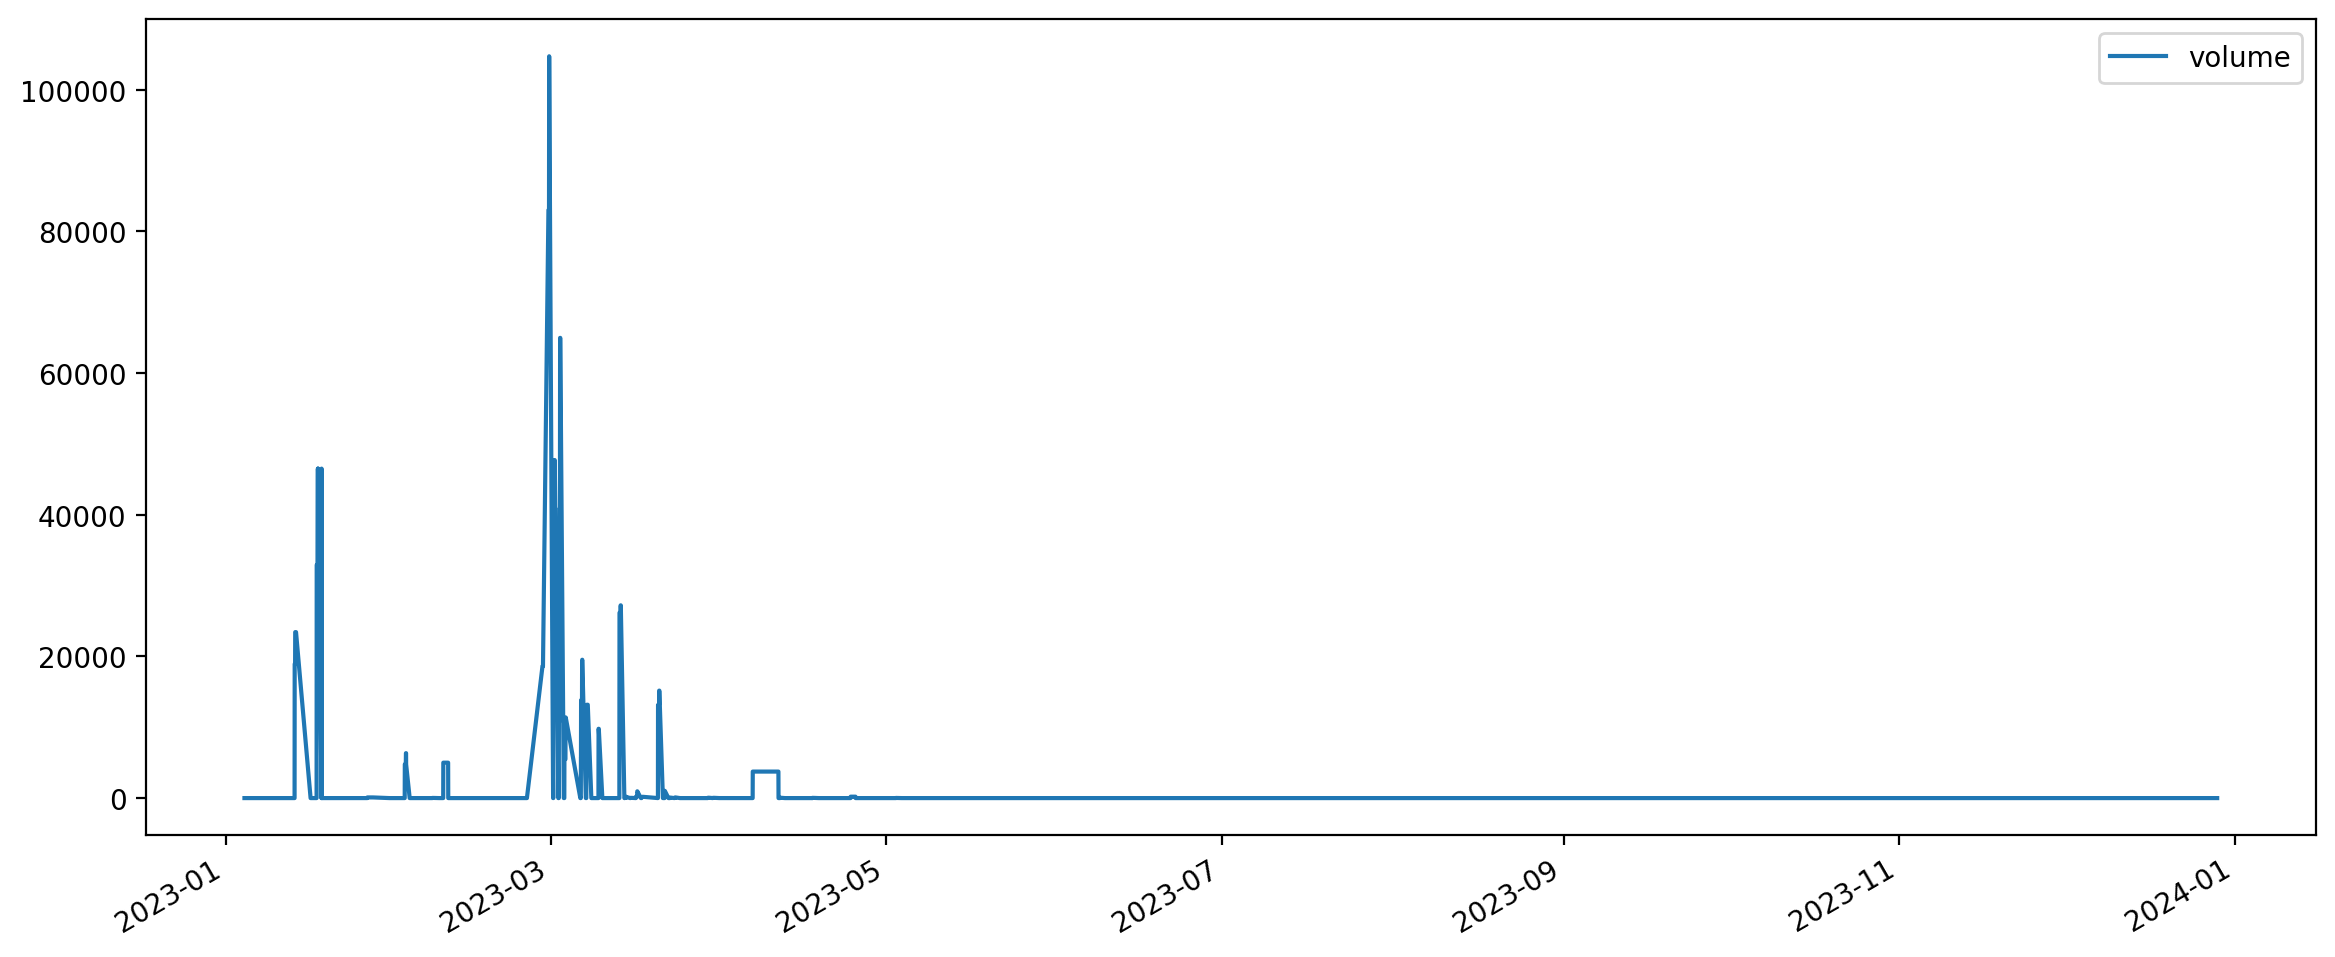

In [31]:
axa.plot(y="volume",  figsize=(14, 6))

/var/folders/gq/smvy125s6gvg8fmg2wlp7flc0000gn/T/ipykernel_18004/2166047495.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  axa.loc["2023-03-02": "2023-03-03", "volume"].plot()


<Axes: >

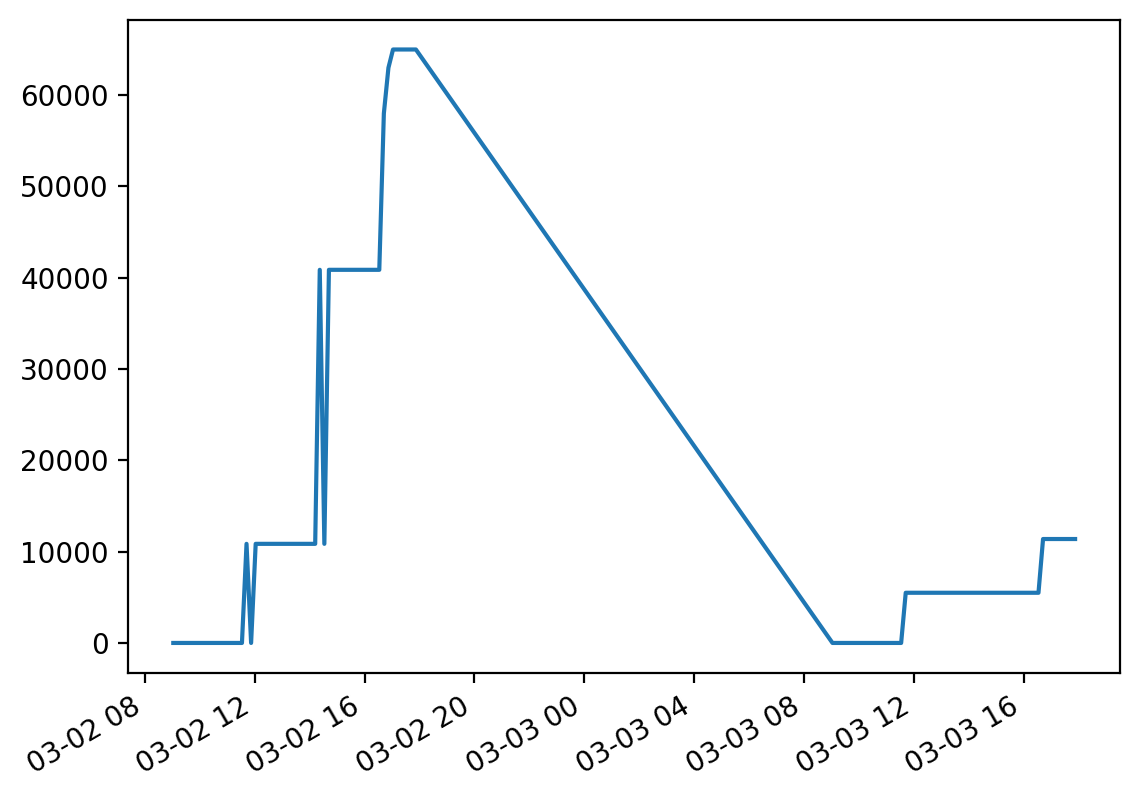

In [33]:
axa.loc["2023-03-02": "2023-03-03", "volume"].plot()

/var/folders/gq/smvy125s6gvg8fmg2wlp7flc0000gn/T/ipykernel_18004/1977244714.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  axa.loc["2023-03-02": "2023-03-03", "last"].plot()


<Axes: >

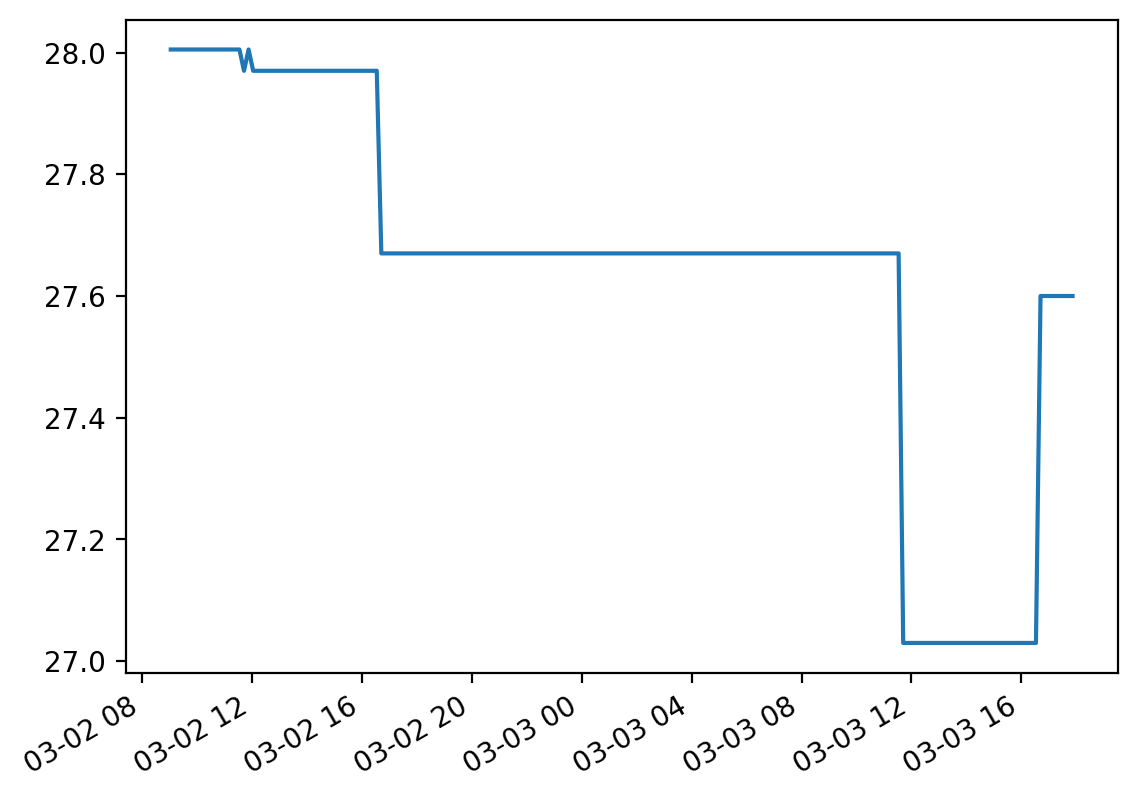

In [34]:
axa.loc["2023-03-02": "2023-03-03", "last"].plot()

In [36]:
axa.sort_index(inplace=True)
axa.loc["2023-03-02": "2023-03-03", "volume"]

/var/folders/gq/smvy125s6gvg8fmg2wlp7flc0000gn/T/ipykernel_18004/2968805645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axa.sort_index(inplace=True)


2023-03-02 09:02:02.156611        0
2023-03-02 09:12:01.487764        0
2023-03-02 09:22:01.911275        0
2023-03-02 09:32:02.134285        0
2023-03-02 09:42:01.725008        0
                              ...  
2023-03-03 17:12:02.157229    11378
2023-03-03 17:22:01.323036    11378
2023-03-03 17:32:01.441334    11378
2023-03-03 17:42:01.505521    11378
2023-03-03 17:52:02.026347    11378
Name: volume, Length: 108, dtype: int64

Conclusion: les volumes et les prix des cours sont cohérents car ils ont la meme monotonie

In [37]:
axa.head()

,last,volume,symbol,name
2023-01-04 09:02:02.203260,23.5,0,1rPCSNV,AXA
2023-01-04 09:12:01.494111,23.5,0,1rPCSNV,AXA
2023-01-04 09:22:01.845321,23.5,0,1rPCSNV,AXA
2023-01-04 09:32:01.823947,23.5,0,1rPCSNV,AXA
2023-01-04 09:42:02.275829,23.5,0,1rPCSNV,AXA


Reproduisons cela pour toutes les actions

Supprimons Les jours off

In [38]:
from IPython.display import display
from dateutil.parser import parse

day_off = ['2018-01-01', '2018-03-30', '2018-04-02', '2018-05-01', '2018-12-25', '2018-12-26']
for d in day_off:
    compA.drop(compA.loc[d].index, inplace=True )

In [39]:
# on ajoute la colonne des symboles en index et on la met en premier
compA = compA.set_index('symbol', append=True)
compA = compA.swaplevel(0,1).sort_index()
compA.head()


last  volume              name
symbol                                                               
1rAAF  2023-01-02 09:02:01.941047  4.356(c)       0  AIR FRANCE - KLM
       2023-01-02 09:12:02.234401  4.356(c)       0  AIR FRANCE - KLM
       2023-01-02 09:22:01.577644  4.356(c)       0  AIR FRANCE - KLM
       2023-01-02 09:32:02.270436  4.356(c)       0  AIR FRANCE - KLM
       2023-01-02 09:42:01.776871  4.356(c)       0  AIR FRANCE - KLM

In [40]:
compA["last"] = [x.split("(c)")[0] for x in compA["last"]]
compA["last"] = [x.split("(s)")[0] for x in compA["last"]]


In [42]:
def convertion(x):
    try:
        return float(x)
    except:
        return float(x.replace(' ',''))
    
compA['last'] = compA['last'].apply(convertion)

In [44]:
compA["last"] = compA["last"].astype("float")
print("moyenne des cours de compA: ",np.mean(compA["last"]))

moyenne des cours de compA:  130.43553985515476


<Axes: >

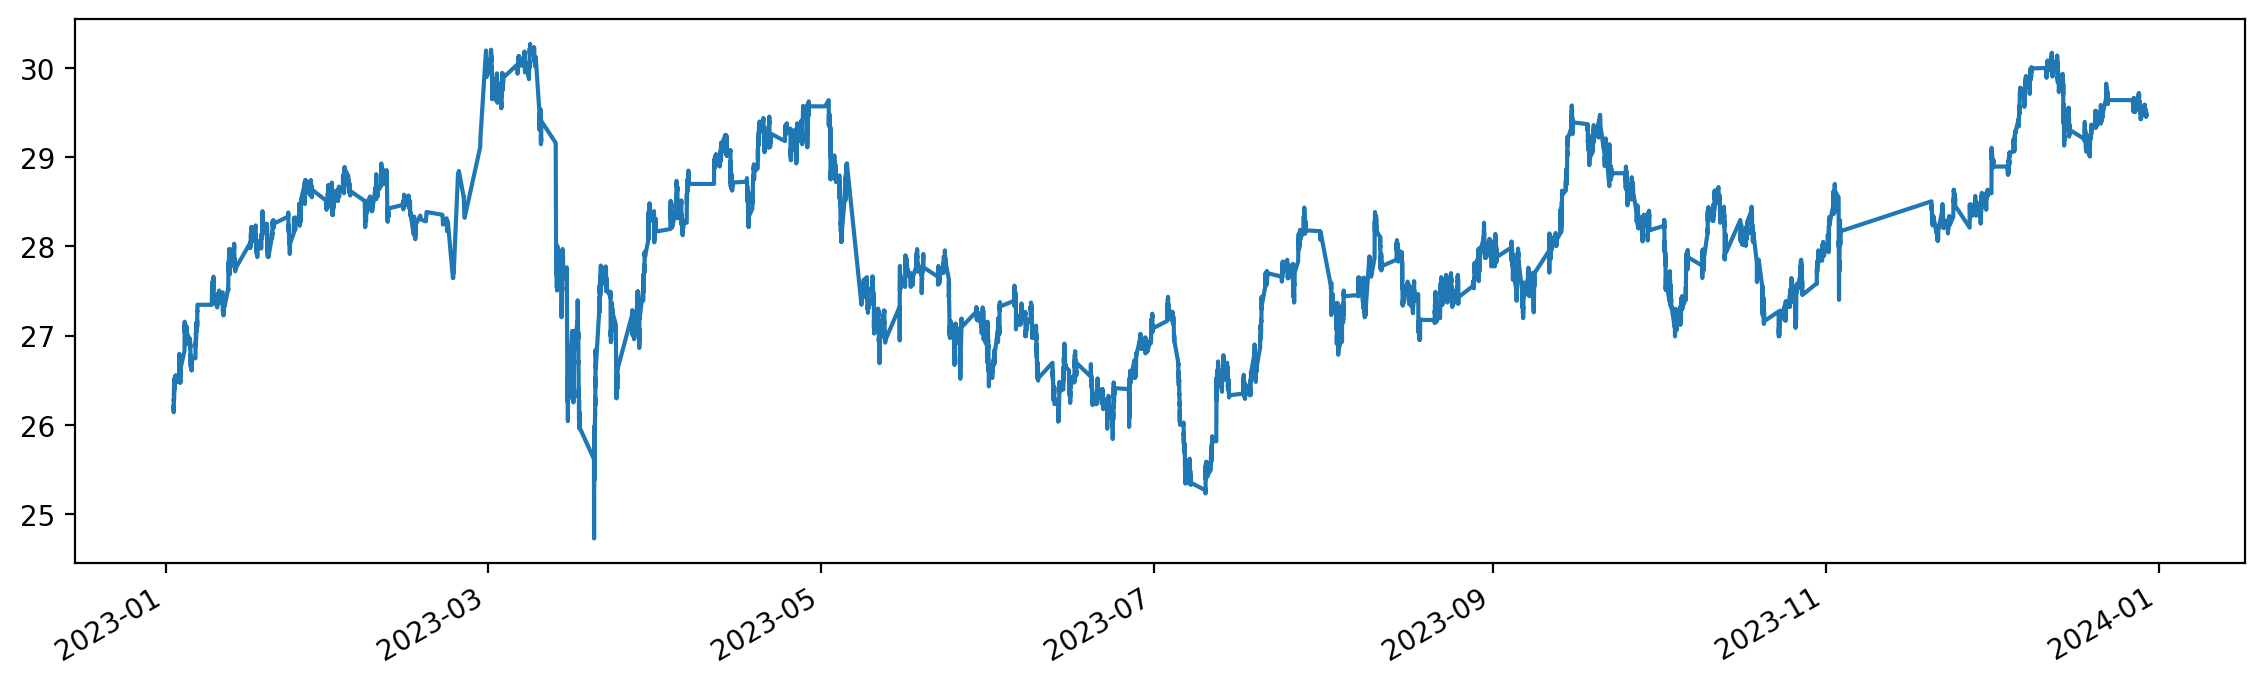

In [45]:
# Vérifions que la courbe d'AXA est toujours la même
compA.loc['1rPCS','last'].plot(figsize=(14,4))

In [51]:
print("masse monetaire avant: ", (compA["volume"] * compA["last"]).sum())

masse monetaire avant:  13422093916984.098
